# Overall Model Test

In [10]:
import joblib
import pandas as pd

In [11]:
#load data from csv
df = pd.read_csv("output.csv")
y = df['Target variable ( 1: Defaulters / 0: Non-Defaulters)']
X = df[['EMI', 'Loan Amount', 'Maximum amount sanctioned for any Two wheeler loan', 
                       'Age at which customer has taken the loan', 'Rate of Interest', 
                        'Number of times 30 days past due in last 6 months', 'Maximum MOB (Month of business with TVS Credit)',
                       'Number of times 60 days past due in last 6 months', 'Number of loans', 
                        'Maximum amount sanctioned in the Live loans', 'Number of times 90 days past due in last 3 months', 
                       'Tenure', 'Number of times bounced while repaying the loan']]

In [12]:
#load the saved model - change filename variable as desired
filename = 'logistic_regression_oversample.sav'
model = joblib.load(filename)

In [13]:
from sklearn.preprocessing import MinMaxScaler

#setup predictions from model
X_scaler = MinMaxScaler().fit(X.copy())

X_overall_scaled = X_scaler.transform(X.copy())

#compare with the test data!
predictions = model.predict(X_overall_scaled)

In [14]:
#score model
model.score(X_overall_scaled, y)

0.5077789261817984

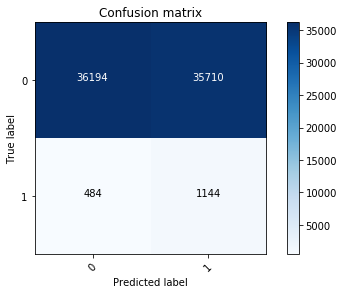

In [15]:
from confusion_matrix_plot import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

thresh = 0.08
predictions [predictions > thresh] = 1
predictions [predictions <= thresh] = 0
cm = confusion_matrix(y, predictions)
plot_confusion_matrix(cm, ['0', '1'], )